In [6]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import scienceplots
import pandas as pd 
import numpy as np
import random 
from datetime import datetime
import matplotlib.ticker as ticker
from random import randrange, uniform



import json 
from numpy import loadtxt


#mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = 'Neue Haas Grotesk Text Pro'
pyplot.style.use(['science','grid'])


#pyplot.rc('text', usetex=True)
val = 35
width = 0.35
barWidth = 0.3

In [70]:
def plot_locking_writers(reader=8):
    #This function plots the execution time of writers alongside that 
    #of the locking time. 
    #It tries to compare with no-lock (ideal) and (atomic operations)

    #get locking times
    appendpath = "result_micro/"+str(reader)+"_reader/" 
    appendpathatom = "result_micro/atomic/"+str(reader)+"_reader/" 

    writerange = [x*8 for x in range(1,6)]
    writercounter = [x for x in range(0,5)]
    writerlockingtimes = []
    writerexectimes = []
    readerlocktime = []
    readerexectime = []
    readerfinal_exectime = []

    writerlockingtimesatom = []
    writerexectimesatom = []
    readerlocktimeatom = []
    readerexectimeatom = []
    readerfinal_exectimeatom = []




    # get the lock version 
    for writer in writercounter:
        writerlockingtimes.append(pd.read_csv(appendpath+"locktime_"+str(writerange[writer]),names=["time"]))
        writerexectimes.append(pd.read_csv(appendpath+"exectime_"+str(writerange[writer]),names=["time"]))
        readerlocktime.append(pd.read_csv(appendpath+"reader_locktime_"+str(writerange[writer]),names=["time"]))
        readerexectime.append(pd.read_csv(appendpath+"reader_exectime_"+str(writerange[writer]),names=["time"]))
        readerfinal_exectime.append(pd.read_csv(appendpath+"readerfinal_exectime_"+str(writerange[writer]),names=["time"]))

    for writer in writercounter:
        writerlockingtimesatom.append(pd.read_csv(appendpathatom+"locktime_"+str(writerange[writer]),names=["time"]))
        writerexectimesatom.append(pd.read_csv(appendpathatom+"exectime_"+str(writerange[writer]),names=["time"]))
        readerlocktimeatom.append(pd.read_csv(appendpathatom+"reader_locktime_"+str(writerange[writer]),names=["time"]))
        readerexectimeatom.append(pd.read_csv(appendpathatom+"reader_exectime_"+str(writerange[writer]),names=["time"]))
        readerfinal_exectimeatom.append(pd.read_csv(appendpathatom+"readerfinal_exectime_"+str(writerange[writer]),names=["time"]))

    #get the atomic version

    #plot the writer locking over exectimes 



    wltimes = np.array([writerlockingtimes[x].mean()*1000000 for x in writercounter])
    print(wltimes[0])

    wltimes = [x[0] for x in wltimes]

    wetimes = np.array([writerexectimes[x].mean()*1000000 for x in writercounter])
    wltimes = [x[0] for x in wltimes]

    reltimes = [readerlocktime[x].mean() for x in writercounter]
    retimes = [readerexectime[x].mean() for x in writercounter]
    reftimes = [readerfinal_exectime[x].mean() for x in writercounter]

    wltimesatm = np.array([writerlockingtimesatom[x].mean()*1000000 for x in writercounter])
    wltimesatm = [x[0] for x in wltimesatm]

    wetimesatm = np.array([writerexectimesatom[x].mean()*1000000 for x in writercounter])
    wetimesatm = [x[0] for x in wetimesatm]

    reltimesatm = [readerlocktimeatom[x].mean() for x in writercounter]
    retimesatm = [readerexectimeatom[x].mean() for x in writercounter]
    reftimesatm = [readerfinal_exectimeatom[x].mean() for x in writercounter]
    
    f, (ax1) = pyplot.subplots(1,1)

    ax1.set_xlabel("\# of writers")
    ax1.set_ylabel("Time ($\mu$ s)")

    x = np.arange(len(writerange))
    x2 = [x + barWidth for x in x]

    print(wltimes)
    
    ax1.bar(x, wltimes, width = barWidth, color = 'white', edgecolor = 'black', lw=2, capsize=7, label='locktime')
    ax1.bar(x, wetimes, width = barWidth, color = 'gray', edgecolor = 'black', lw=2, capsize=7, label='exectime',bottom=wltimes)

    ax1.bar(x2, wltimesatm, width = barWidth, color = 'white', edgecolor = 'black', lw=2, capsize=7, label='atomic',hatch="/")
    ax1.bar(x2, wetimesatm, width = barWidth, color = 'gray', edgecolor = 'black',  lw=2, capsize=7, label='atm-exectime',bottom=wltimesatm,hatch="/")

    
    ax1.legend(ncol=4)

    ax1.tick_params(axis='y', which='major')
    ax1.tick_params(axis='x', which='major')

    pyplot.tight_layout()
    pyplot.savefig("figures/"+str(reader)+"_writer_lock.pdf",format="pdf",dpi=300)


    pyplot.show()

    return 

def plot_locking_readers(reader=8):
    #This function plots the execution time of writers alongside that 
    #of the locking time. 
    #It tries to compare with no-lock (ideal) and (atomic operations)

    #get locking times
    appendpath = "result_micro/"+str(reader)+"_reader/" 
    appendpathatom = "result_micro/atomic/"+str(reader)+"_reader/" 

    writerange = [x*8 for x in range(1,5)]
    writercounter = [x for x in range(0,4)]
    
    readerlocktime = []
    readerexectime = []
    readerfinal_exectime = []

   
    readerlocktimeatom = []
    readerexectimeatom = []
    readerfinal_exectimeatom = []




    # get the lock version 
    for writer in writercounter:
        readerlocktime.append(pd.read_csv(appendpath+"reader_locktime_"+str(writerange[writer]),names=["time"]))
        readerexectime.append(pd.read_csv(appendpath+"reader_exectime_"+str(writerange[writer]),names=["time"]))
        readerfinal_exectime.append(pd.read_csv(appendpath+"readerfinal_exectime_"+str(writerange[writer]),names=["time"]))

    for writer in writercounter:
        readerlocktimeatom.append(pd.read_csv(appendpathatom+"reader_locktime_"+str(writerange[writer]),names=["time"]))
        readerexectimeatom.append(pd.read_csv(appendpathatom+"reader_exectime_"+str(writerange[writer]),names=["time"]))
        readerfinal_exectimeatom.append(pd.read_csv(appendpathatom+"readerfinal_exectime_"+str(writerange[writer]),names=["time"]))

    #get the atomic version

    #plot the writer locking over exectimes 



    reltimes = np.array([readerlocktime[x].mean()*1000000 for x in writercounter])
    reltimes = [x[0] for x in reltimes]
    retimes = np.array([readerexectime[x].mean()*1000000 for x in writercounter])
    retimes = [x[0] for x in retimes]

    reftimes = [readerfinal_exectime[x].mean() for x in writercounter]

    reltimesatm = np.array([readerlocktimeatom[x].mean()*1000000 for x in writercounter])
    reltimesatm = [x[0] for x in reltimesatm]
    retimesatm = np.array([readerexectimeatom[x].mean()*1000000 for x in writercounter])
    retimesatm = [x[0] for x in retimesatm]

    reftimesatm = [readerfinal_exectimeatom[x].mean() for x in writercounter]
    
    f, (ax1) = pyplot.subplots(1,1)

    ax1.set_xlabel("\# of writers")
    ax1.set_ylabel("Time ($\mu$ s)")

    x = np.arange(len(writerange))
    x2 = [x + barWidth for x in x]
    
    ax1.bar(x, reltimes, width = barWidth, color = 'white', edgecolor = 'black', capsize=7, label='locktime')
    ax1.bar(x, retimes, width = barWidth, color = 'gray', edgecolor = 'black', capsize=7, label='exectime',bottom=reltimes)

    ax1.bar(x2, reltimesatm, width = barWidth, color = 'white', edgecolor = 'black', capsize=7, label='atomic',hatch="/")
    ax1.bar(x2, retimesatm, width = barWidth, color = 'gray', edgecolor = 'black', capsize=7, label='atm-exectime',bottom=reltimesatm,hatch="/")

    
    ax1.legend(ncol=4)

    ax1.tick_params(axis='y', which='major')
    ax1.tick_params(axis='x', which='major')

    pyplot.tight_layout()
    pyplot.savefig("figures/"+str(reader)+"_reader_lock.pdf",format="pdf",dpi=300)


    pyplot.show()

    return 


# standard pthread vs dlock

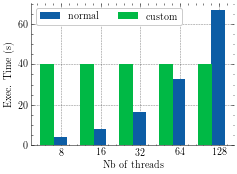

In [6]:
dataframe = pd.read_csv("./expes/prelim.dat",names=["cores","normal","custom"],sep='\t')

f, (ax1) = pyplot.subplots(1,1)

ax1.set_xlabel("Nb of threads")
ax1.set_ylabel("Exec. Time (s)")

threads_nb = [8,16,32,64,128]
x = np.arange(len(threads_nb))

ax1.tick_params(axis='x', which='major')

ax1.xaxis.set_major_locator(ticker.FixedLocator((x)))
ax1.xaxis.set_major_formatter(ticker.FixedFormatter((threads_nb)))


rec1=ax1.bar(x-width/10,dataframe["normal"],width,lw=2,label="normal")
rec2=ax1.bar(x-width,dataframe["custom"],width,lw=2,label="custom")

ax1.legend(ncol=2)

ax1.tick_params(axis='y', which='major')
ax1.tick_params(axis='x', which='major')

pyplot.tight_layout()
pyplot.savefig("example.pdf",format="pdf",dpi=300)


pyplot.show()



## Locking time vs exec time for writers --- microbench

In [71]:
readers = [1,8,16,24,32,40]
for i in readers:
    plot_locking_writers(i)
    plot_locking_readers(i)


[307.20578569]


IndexError: invalid index to scalar variable.